Milestone2[Pre-processing & clustering]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import font
data = pd.read_csv('C:/Users/amitp/OneDrive/Desktop/jupyter/Healthcare Providers.csv')
data.head()


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [2]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [8]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


Data Preprocessing

In [9]:
# Merging name columns into a single 'Full Name' column
data['Full Name'] = (data['First Name of the Provider'].fillna('') + ' ' +
                     data['Middle Initial of the Provider'].fillna('') + ' ' +
                     data['Last Name/Organization Name of the Provider'].fillna(''))

# Strip any extra whitespace
data['Full Name'] = data['Full Name'].str.strip()

# Drop individual name columns
data = data.drop(columns=['Last Name/Organization Name of the Provider', 
                          'First Name of the Provider', 
                          'Middle Initial of the Provider'])

# Reinsert 'Full Name' column to the second position
full_name_column = data.pop('Full Name')  # Remove 'Full Name' to prepare for reinsertion
data.insert(1, 'Full Name', full_name_column)  # Reinsert 'Full Name' at index 1

# Display the updated DataFrame
data.head()


,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


In [10]:
# Uniform format of credentials
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


Converting Object to Numeric Type

In [11]:
import pandas as pd

# Assuming 'data' is your existing DataFrame
# Define numeric columns
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Convert columns to numeric type, coerce errors to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display DataFrame information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               92791 non-null   object 
 4   Gender of the Provider                                    95746 non-null   object 
 5   City of the Provider                                      100000 non-null  object 
 6   State Code of the Provider                                100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Numbe

locating missing values and appending the mean to them

In [12]:
# missing values
print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                          2653
Number of Medicare Beneficiaries                             405
Number of Distinct Medicare Beneficiary/Per Day Services    1500
Average Medicare Allowed Amount                              745
Average Submitted Charge Amount                             6723
Average Medicare Payment Amount                              466
Average Medicare Standardized Amount                         470
dtype: int64


In [13]:
import pandas as pd

# Assuming 'data' is your existing DataFrame
# Define numeric columns
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Convert columns to numeric type, coerce errors to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Impute missing values with mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Check for remaining null values
print(data.isnull().sum())


index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge Amount                                0
Average Medicare Payment Amount                                0
Average Medicare Standardized Amount                           0
dtype: int64


Looking for Duplicate Values

In [14]:
print(data.duplicated().sum())

0


In [15]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


locating missing values and appending the mean to them

In [16]:
def frequency_encode(df, columns):
    """
    Performs frequency encoding for specified columns in the dataframe.
    
    Parameters:
    - df: Pandas DataFrame
    - columns: List of columns to perform frequency encoding
    
    Returns:
    - df: Updated Pandas DataFrame with frequency encoded columns
    """
    for column in columns:
        # Calculate frequency of each category
        freq_encoding = df[column].value_counts() / len(df)
        
        # Create new column name for frequency encoded feature
        new_column_name = column + '_Freq'
        
        # Insert new column with frequency encoded values
        df.insert(df.columns.get_loc(column) + 1, new_column_name, df[column].map(freq_encoding))
    
    return df

# Columns to perform frequency encoding on
columns_to_encode = [
    'Credentials of the Provider',
    'Gender of the Provider',
    'Provider Type',
    'State Code of the Provider'
]

# Apply frequency encoding to data
data = frequency_encode(data, columns_to_encode)

# Display the first few rows of the updated DataFrame
data.head()


,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.66618,F,0.29105,SAINT LOUIS,MO,0.01997,Internal Medicine,0.11366,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,0.66618,F,0.29105,FAYETTEVILLE,NC,0.03725,Obstetrics & Gynecology,0.01028,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,0.01915,M,0.66641,NORTH HAVEN,CT,0.01403,Podiatry,0.02027,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,0.66618,M,0.66641,KANSAS CITY,MO,0.01997,Internal Medicine,0.11366,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,0.06176,M,0.66641,JUPITER,FL,0.07263,Internal Medicine,0.11366,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
standardization_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Credentials of the Provider_Freq',
    'Gender of the Provider_Freq',
    'State Code of the Provider_Freq'
]

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Standardize selected columns
data[standardization_columns] = standard_scaler.fit_transform(data[standardization_columns])

# Create a copy of the DataFrame for reference
data_copy = data.copy()

# Display the first few rows of the standardized DataFrame
print("Standardized DataFrame:")
print(data.head())


Standardized DataFrame:
     index               Full Name  National Provider Identifier  \
0  8774979  SATYASREE  UPADHYAYULA                    1891106191   
1  3354385           WENDY P JONES                    1346202256   
2  3001884      RICHARD W DUROCHER                    1306820956   
3  7594822         JASPER  FULLARD                    1770523540   
4   746159      ANTHONY E PERROTTI                    1073627758   

  Credentials of the Provider  Credentials of the Provider_Freq  \
0                          MD                          0.626227   
1                          MD                          0.626227   
2                         DPM                         -1.600476   
3                          MD                          0.626227   
4                          DO                         -1.453837   

  Gender of the Provider  Gender of the Provider_Freq City of the Provider  \
0                      F                    -1.513167          SAINT LOUIS   
1       

PCA

C:\Users\amitp\AppData\Local\Temp\ipykernel_8988\1685432612.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\amitp\AppData\Local\Temp\ipykernel_8988\1685432612.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

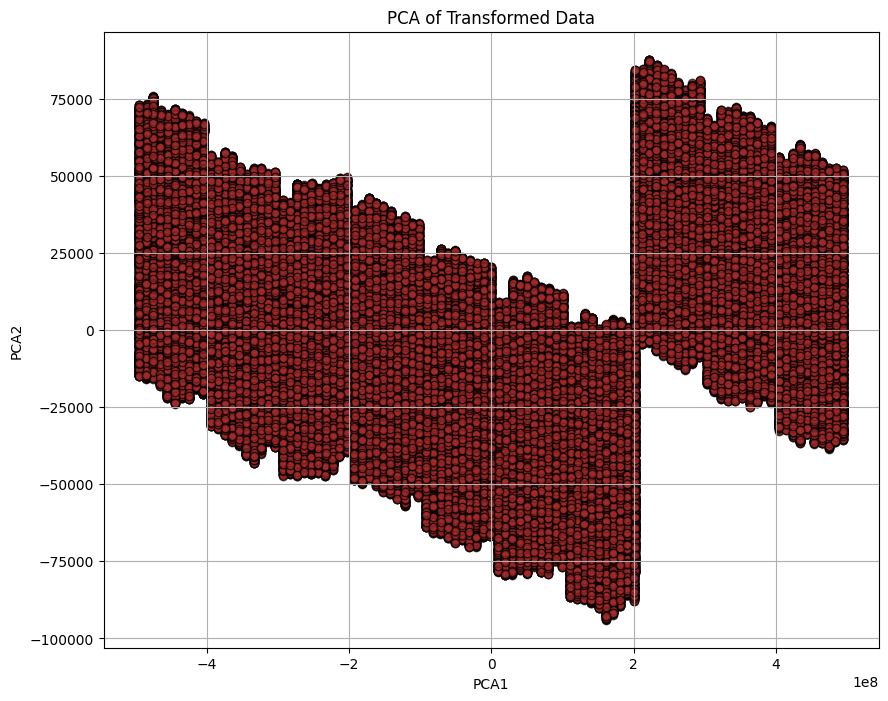

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Make a copy of the original data
df = data.copy()

# Impute missing values in categorical columns with mode
categorical_columns = [
    'Full Name',
    'Credentials of the Provider',
    'Gender of the Provider',
    'City of the Provider',
    'Provider Type',
    'State Code of the Provider'
]

for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Drop categorical columns for PCA analysis
df = df.drop(columns=categorical_columns)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Scatter plot of PCA components with custom design
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], color='brown', alpha=0.7, edgecolors='k')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Transformed Data')
plt.grid(True)
plt.show()


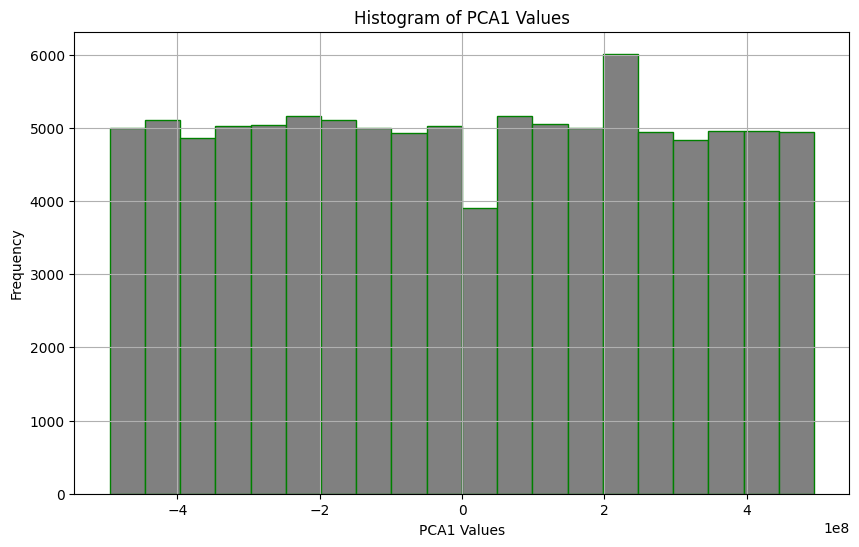

In [22]:
import matplotlib.pyplot as plt

# Extract PCA1 values from pca_df
pca1_values = pca_df['PCA1']

# Plot histogram of PCA1 values with custom design
plt.figure(figsize=(10, 6))
plt.hist(pca1_values, bins=20, edgecolor='green', color='grey')
plt.xlabel('PCA1 Values')
plt.ylabel('Frequency')
plt.title('Histogram of PCA1 Values')
plt.grid(True)
plt.show()


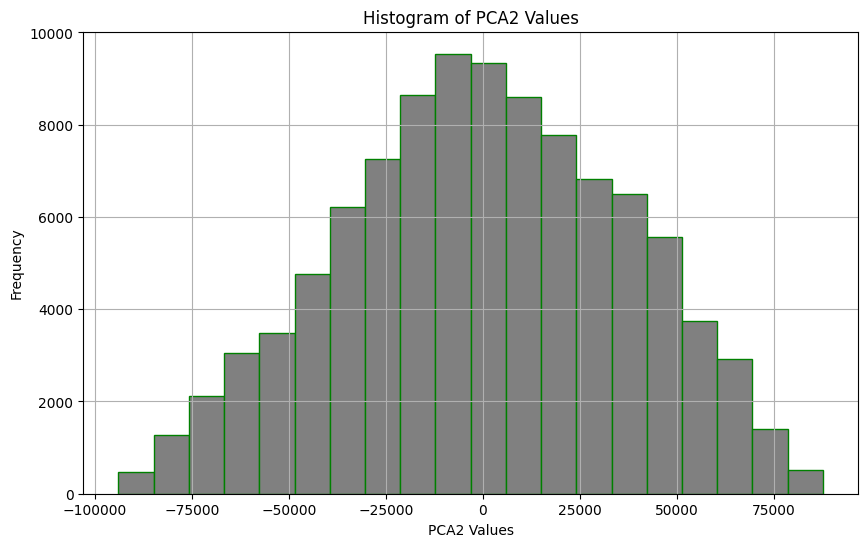

In [25]:
import matplotlib.pyplot as plt

# Extract PCA2 values from pca_df
pca2_values = pca_df['PCA2']

# Plot histogram of PCA2 values with custom design
plt.figure(figsize=(10, 6))
plt.hist(pca2_values, bins=20, edgecolor='green', color='grey')
plt.xlabel('PCA2 Values')
plt.ylabel('Frequency')
plt.title('Histogram of PCA2 Values')
plt.grid(True)
plt.show()


CLUSTERING

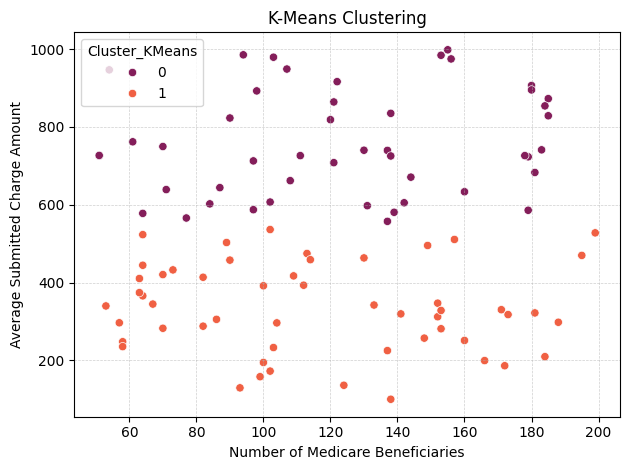

In [9]:
# Import necessary libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Clustering using K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df[numeric_columns])

sns.scatterplot(data=df, x='Number of Medicare Beneficiaries', y='Average Submitted Charge Amount', 
                hue='Cluster_KMeans', palette='rocket', legend='full')
plt.title('K-Means Clustering')
#plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)  # Add subtle grid lines
plt.tight_layout()
plt.show()

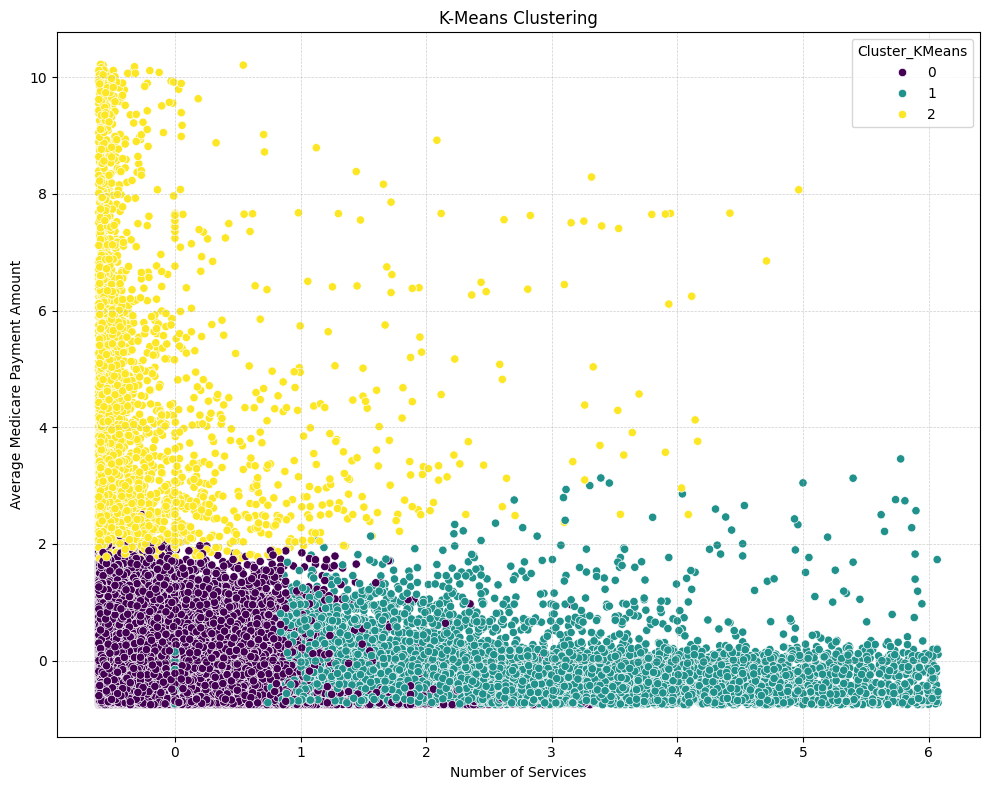

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Perform clustering and assign clusters to data points
df['Cluster_KMeans'] = kmeans.fit_predict(df[numeric_columns])

# Plot scatter plot with clustered data points using 'viridis' color palette
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Number of Services', y='Average Medicare Payment Amount', 
                hue='Cluster_KMeans', palette='viridis', legend='full')

# Customize plot appearance
plt.title('K-Means Clustering')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


DB Scan

Number of noise points: 100


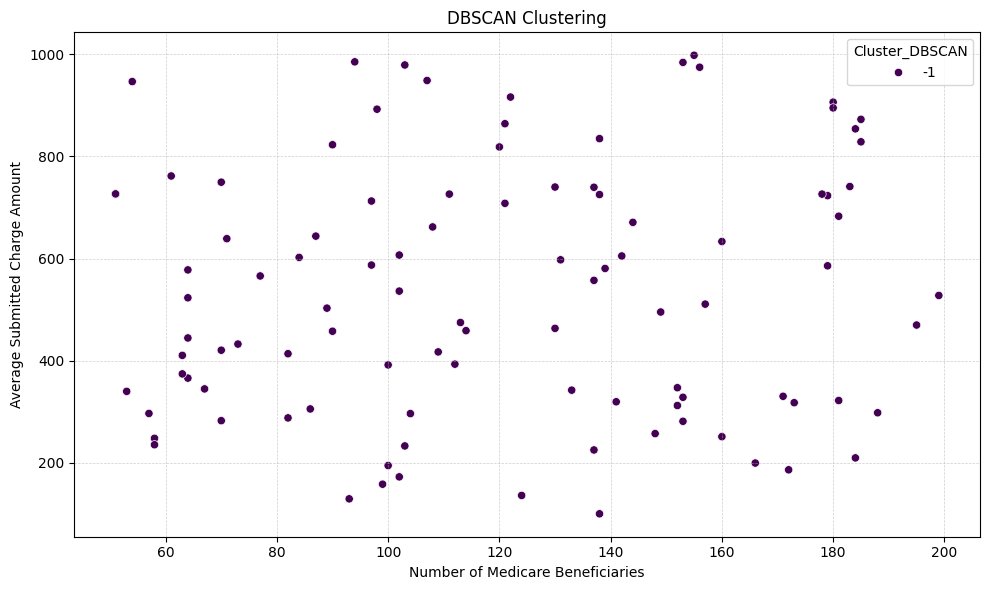

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Creating a sample DataFrame
np.random.seed(42)
data = pd.DataFrame({
    'Number of Medicare Beneficiaries': np.random.randint(50, 200, 100),
    'Average Submitted Charge Amount': np.random.uniform(100, 1000, 100)
})

# Defining numeric columns
numeric_columns = ['Number of Medicare Beneficiaries', 'Average Submitted Charge Amount']

# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=6)
data['Cluster_DBSCAN'] = dbscan.fit_predict(data[numeric_columns])

# Number of noise points
num_noise_points = (data['Cluster_DBSCAN'] == -1).sum()
print(f"Number of noise points: {num_noise_points}")

# Plotting the DBSCAN clustering results
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=data, x='Number of Medicare Beneficiaries', y='Average Submitted Charge Amount', 
                hue='Cluster_DBSCAN', palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)  # Adding subtle grid lines
plt.tight_layout()  # Adjust layout to fit all elements properly
plt.show()
